In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

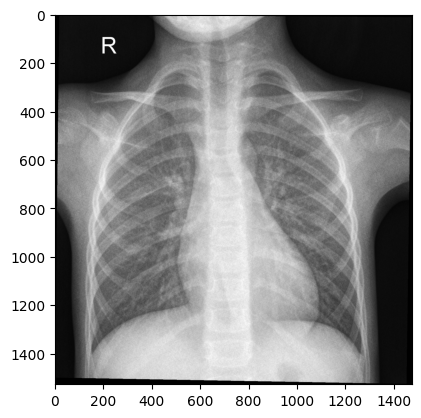

In [51]:
imagePath = '../chest_Xray/train/NORMAL'
trainPath = '../chest_Xray/train'
image = cv2.imread(imagePath + '/NORMAL2-IM-0600-0001.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

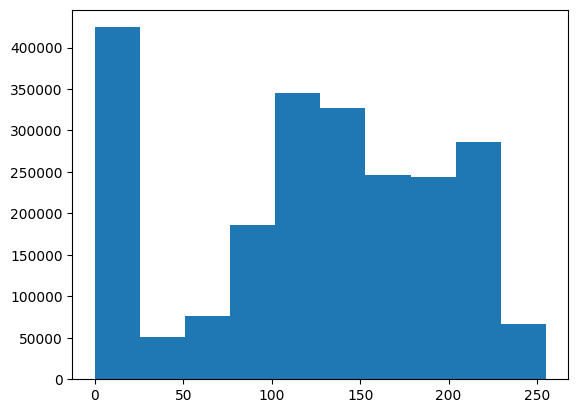

In [52]:
x_data = np.array(image)
pixels = x_data.flatten()

fig, ax = plt.subplots()
ax.hist(pixels)
plt.show()

In [53]:
imgData = []
libelle = []
for typee in ['NORMAL', 'PNEUMONIA']:
    i = 0
    pathType = trainPath + '/' + typee
    for file in os.listdir(pathType):
        if (i > 999):
            continue
        img = cv2.imread(pathType + '/' + file, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        i = i+1
        img = cv2.resize(img, (400,400))
        imgArr = np.array(img)
        pixels = imgArr.flatten()
        imgData.append(pixels)
        libelle.append(typee == 'PNEUMONIA')

imgData = np.array(imgData)
libelle = np.array(libelle)
print(imgData.shape)
print(libelle.shape)

(2000, 160000)
(2000,)


In [56]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(imgData, libelle)

KNeighborsClassifier(n_neighbors=3)

In [58]:
testImgData = []
testLibelle = []
testPath = '../chest_Xray/test'
nbImageTest = 1000
for typee in ['NORMAL', 'PNEUMONIA']:
    i = 0
    pathType = testPath + '/' + typee
    for file in os.listdir(pathType):
        if (i > nbImageTest):
            continue
        img = cv2.imread(pathType +'/'+file, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        i = i + 1
        img = cv2.resize(img, (400,400))
        imgArr = np.array(img)
        pixels = imgArr.flatten()
        testImgData.append(pixels)
        testLibelle.append(typee == 'PNEUMONIA')

neigh.score(testImgData, testLibelle)
        

0.8157051282051282